In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dropout, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import math
import query  # Ensure your query.py is accessible

In [51]:
companies = [
    "Tesla, Inc.",
    "NIO Inc.",
    "The Procter & Gamble Company",
    "Meta Platforms, Inc.",
    "Amazon.com, Inc.",
    "Apple Inc.",
    "Taiwan Semiconductor Manufacturing Company Limited",
    "Microsoft Corporation",
    "Advanced Micro Devices, Inc.",
    "PayPal Holdings, Inc.",
    "Alphabet Inc.",
    "Netflix, Inc.",
    "Costco Wholesale Corporation",
    "The Walt Disney Company",
    "The Coca-Cola Company",
    "The Boeing Company",
    "Northrop Grumman Corporation",
    "Zscaler, Inc.",
    "Enphase Energy, Inc."
]


In [50]:
# Function to prepare data for a single company
def prepare_data_for_company(company_name):
    df_price = query.avg_stock_price()
    df_sentiment = query.avg_daily_sentiment()
    df_merged = pd.merge(df_price, df_sentiment, on=['date', 'company_name'], how='inner')

    # Filter for a specific company
    df_filtered = df_merged[df_merged['company_name'] == company_name]

    # Convert 'date' column to datetime and set as index
    df_filtered['date'] = pd.to_datetime(df_filtered['date'])
    df_filtered.set_index('date', inplace=True)
    df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data

    return df_filtered[['sentiment_value']], df_filtered['average_stock_price']

In [24]:
# Function to create dataset for LSTM
def create_dataset(X, y, time_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - time_steps):
        v = X[i:(i + time_steps)]
        Xs.append(v)
        ys.append(y[i + time_steps])
    return np.array(Xs), np.array(ys)

In [25]:
# Function to create, compile, and train LSTM model
def train_lstm_model(X_train, y_train, X_test, y_test):
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])),
        Dropout(0.2),
        LSTM(50),
        Dropout(0.2),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=100, batch_size=32, verbose=1)
    return model

In [40]:
# Function to evaluate the model
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    return mae, mse, rmse, r2

Training model for Tesla, Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 5s 19ms/step - loss: 0.2936
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 0.2229
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 0.1622
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 0.1048
Epoch 5/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0606
Epoch 6/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0343
Epoch 7/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0230
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0475
Epoch 9/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0439
Epoch 10/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0377
Epoch 11/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0286
Epoch 12/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0252
Epoch 13/100
2/2 [==============================]

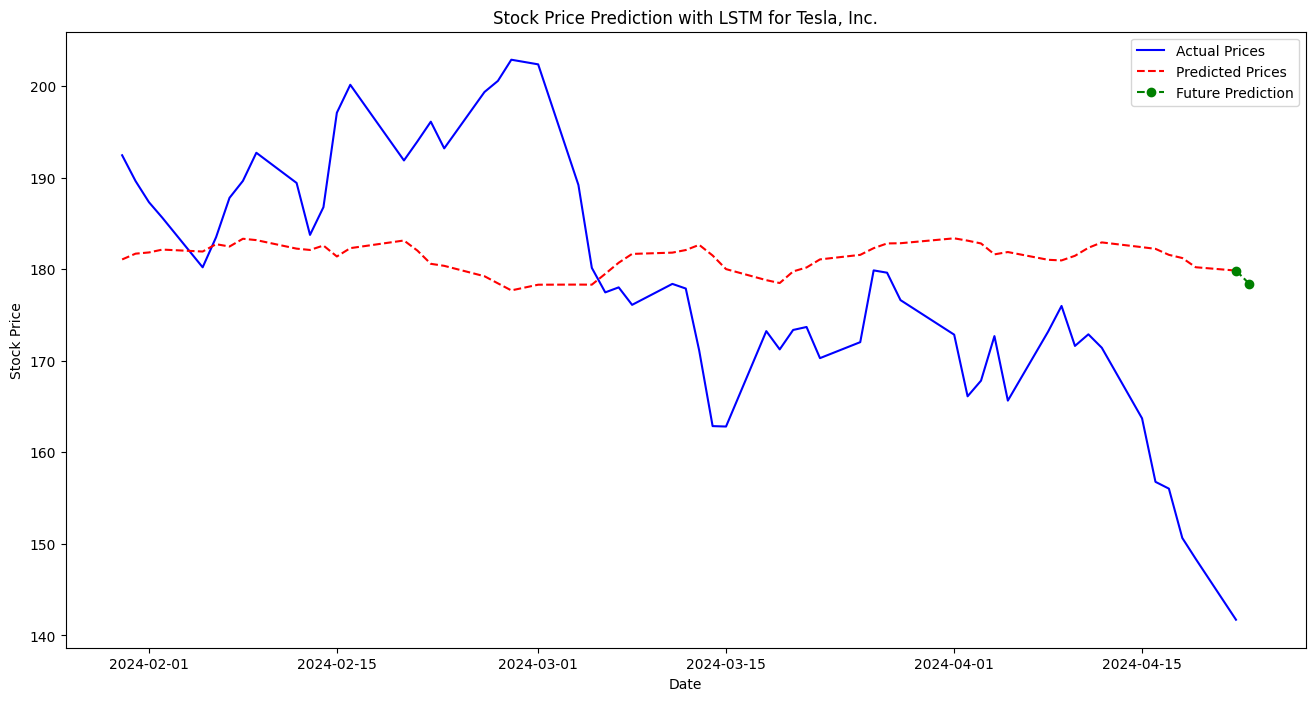

Training model for NIO Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 4s 19ms/step - loss: 0.4237
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.3513
Epoch 3/100
2/2 [==============================] - 0s 17ms/step - loss: 0.2847
Epoch 4/100
2/2 [==============================] - 0s 18ms/step - loss: 0.2173
Epoch 5/100
2/2 [==============================] - 0s 18ms/step - loss: 0.1569
Epoch 6/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0930
Epoch 7/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0521
Epoch 8/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0334
Epoch 9/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0523
Epoch 10/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0570
Epoch 11/100
2/2 [==============================] - 0s 18ms/step - loss: 0.0531
Epoch 12/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0280
Epoch 13/100
2/2 [==============================]

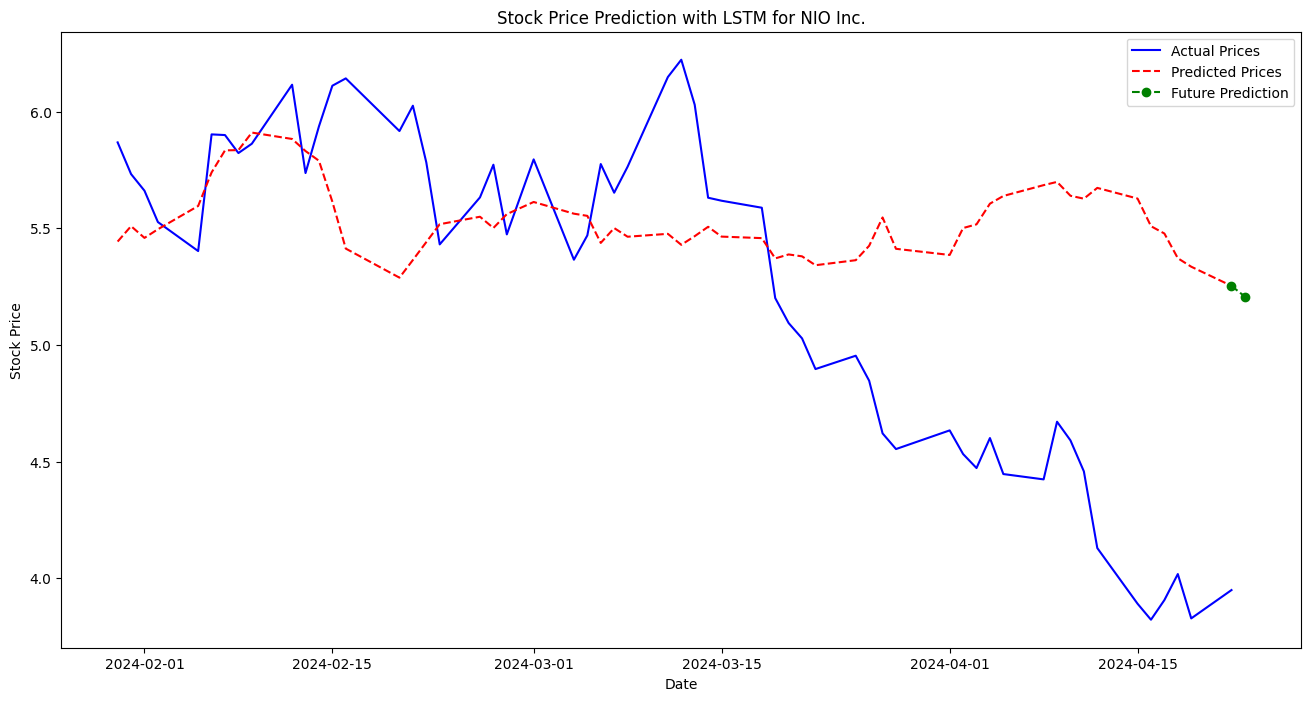

Training model for The Procter & Gamble Company
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 4s 19ms/step - loss: 0.6249
Epoch 2/100
2/2 [==============================] - 0s 29ms/step - loss: 0.5110
Epoch 3/100
2/2 [==============================] - 0s 18ms/step - loss: 0.4016
Epoch 4/100
2/2 [==============================] - 0s 20ms/step - loss: 0.2991
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.1969
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0974
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0388
Epoch 8/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0507
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1000
Epoch 10/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0916
Epoch 11/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0411
Epoch 12/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0313
Epoch 13/100
2/2 [==============================]

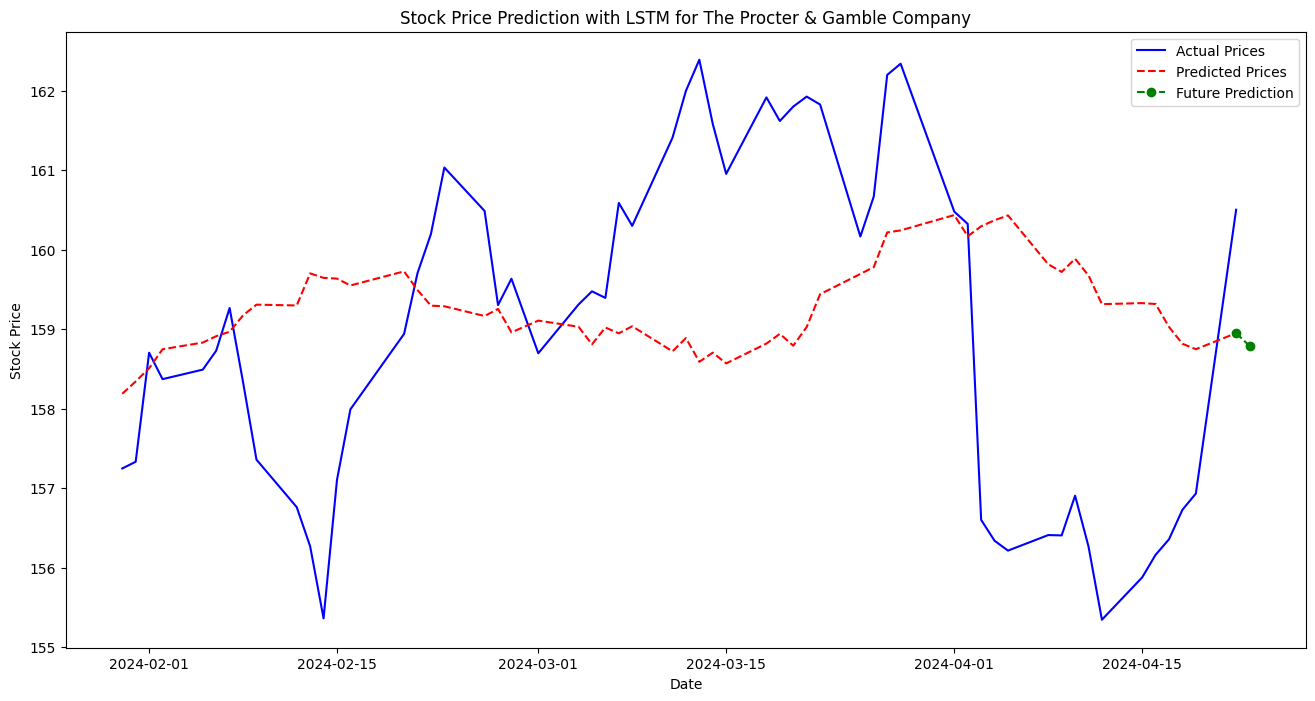

Training model for Meta Platforms, Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 5s 23ms/step - loss: 0.5904
Epoch 2/100
2/2 [==============================] - 0s 19ms/step - loss: 0.4857
Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 0.3805
Epoch 4/100
2/2 [==============================] - 0s 31ms/step - loss: 0.2907
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2038
Epoch 6/100
2/2 [==============================] - 0s 21ms/step - loss: 0.1225
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0547
Epoch 8/100
2/2 [==============================] - 0s 19ms/step - loss: 0.0306
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0652
Epoch 10/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0836
Epoch 11/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0615
Epoch 12/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0394
Epoch 13/100
2/2 [==============================]

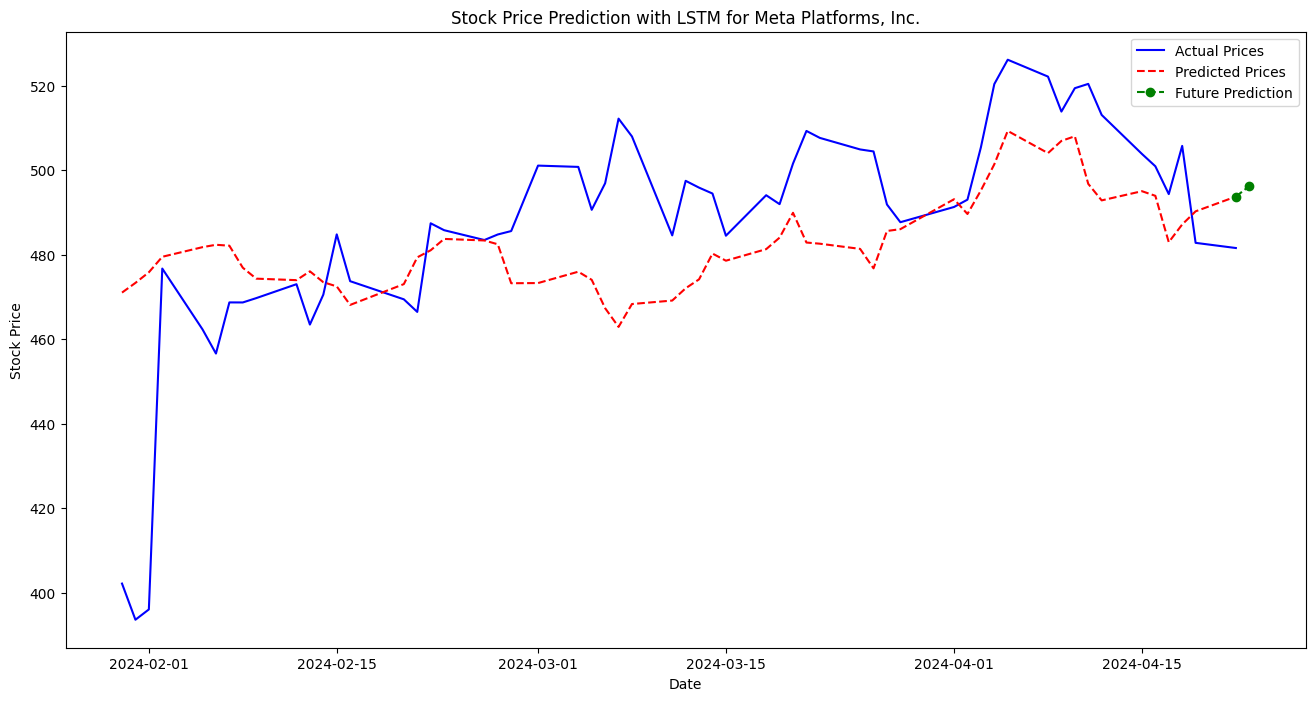

Training model for Amazon.com, Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 8s 24ms/step - loss: 0.4192
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 0.3435
Epoch 3/100
2/2 [==============================] - 0s 23ms/step - loss: 0.2610
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1997
Epoch 5/100
2/2 [==============================] - 0s 25ms/step - loss: 0.1301
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0699
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0304
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0285
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0501
Epoch 10/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0575
Epoch 11/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0344
Epoch 12/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0239
Epoch 13/100
2/2 [==============================]

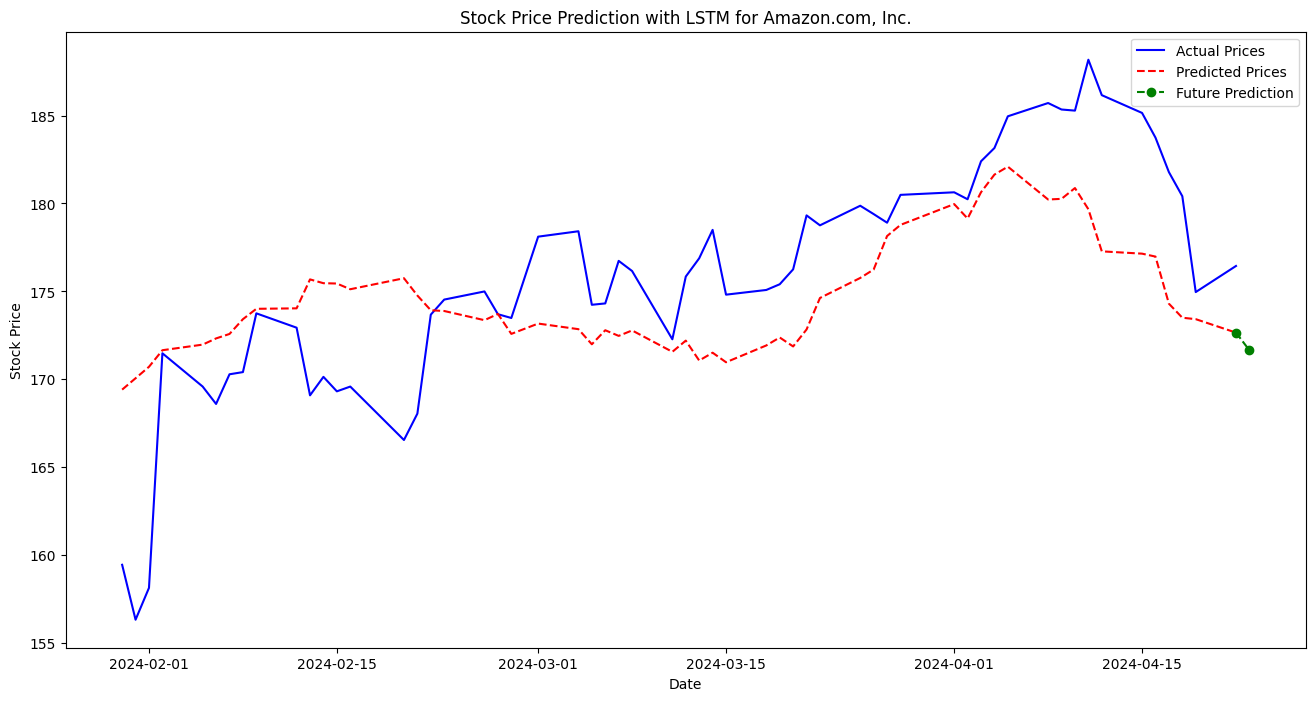

Training model for Apple Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 4s 30ms/step - loss: 0.2452
Epoch 2/100
2/2 [==============================] - 0s 25ms/step - loss: 0.1805
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 0.1214
Epoch 4/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0852
Epoch 5/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0634
Epoch 6/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0693
Epoch 7/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0682
Epoch 8/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0746
Epoch 9/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0645
Epoch 10/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0634
Epoch 11/100
2/2 [==============================] - 0s 33ms/step - loss: 0.0621
Epoch 12/100
2/2 [==============================] - 0s 31ms/step - loss: 0.0600
Epoch 13/100
2/2 [==============================]

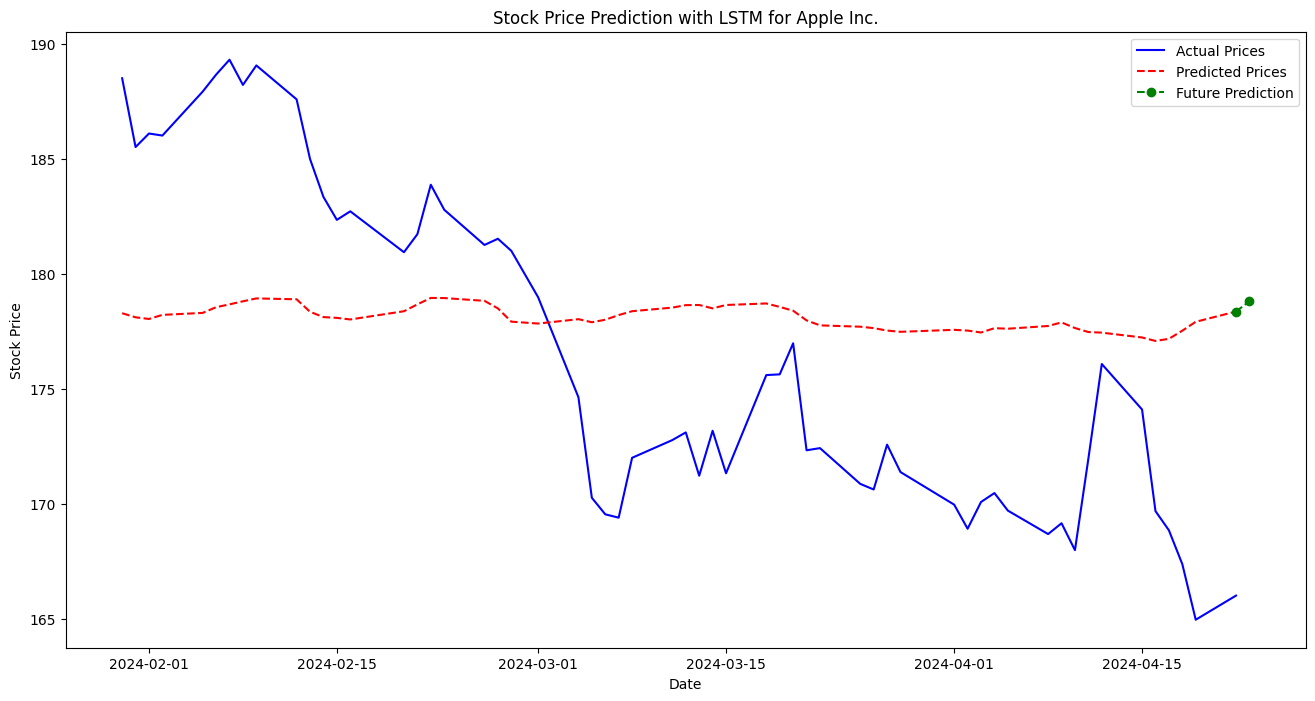

Training model for Taiwan Semiconductor Manufacturing Company Limited
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 5s 25ms/step - loss: 0.4639
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.3590
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 0.2725
Epoch 4/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1950
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.1168
Epoch 6/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0699
Epoch 7/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0555
Epoch 8/100
2/2 [==============================] - 0s 24ms/step - loss: 0.1059
Epoch 9/100
2/2 [==============================] - 0s 23ms/step - loss: 0.1008
Epoch 10/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0684
Epoch 11/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0573
Epoch 12/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0594
Epoch 13/100
2/2 [==============================]

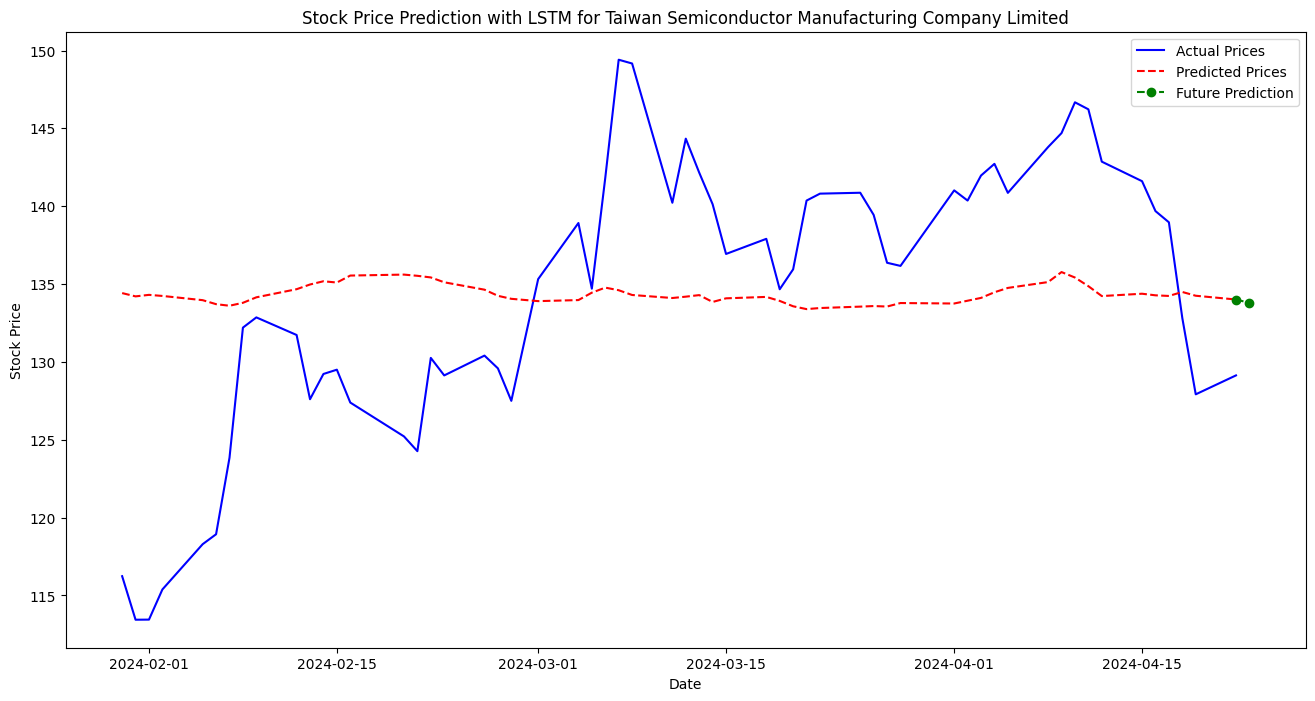

Training model for Microsoft Corporation
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 4s 22ms/step - loss: 0.3774
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 0.2878
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 0.2213
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 0.1504
Epoch 5/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0857
Epoch 6/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0514
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0554
Epoch 8/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0830
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0697
Epoch 10/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0392
Epoch 11/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0425
Epoch 12/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0446
Epoch 13/100
2/2 [==============================]

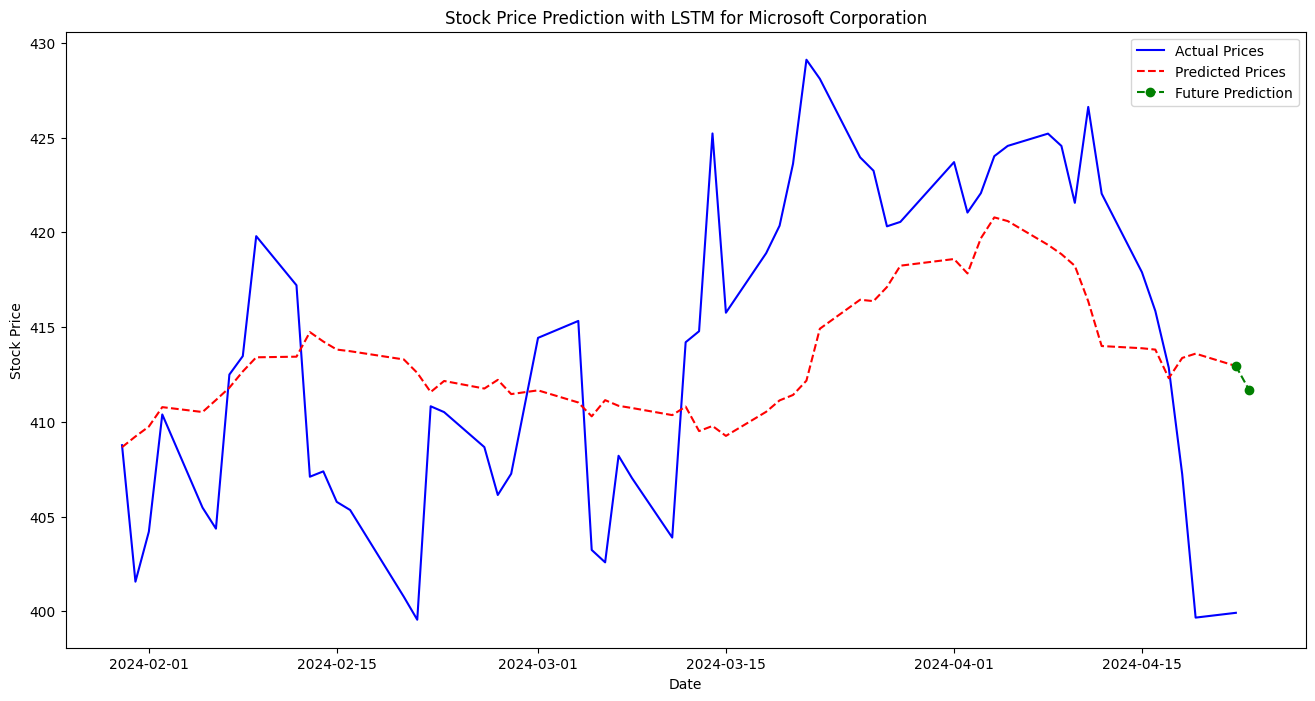

Training model for Advanced Micro Devices, Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 4s 26ms/step - loss: 0.3355
Epoch 2/100
2/2 [==============================] - 0s 22ms/step - loss: 0.2641
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 0.1974
Epoch 4/100
2/2 [==============================] - 0s 26ms/step - loss: 0.1435
Epoch 5/100
2/2 [==============================] - 0s 30ms/step - loss: 0.0922
Epoch 6/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0566
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0637
Epoch 8/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0724
Epoch 9/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0777
Epoch 10/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0631
Epoch 11/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0516
Epoch 12/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0476
Epoch 13/100
2/2 [==============================]

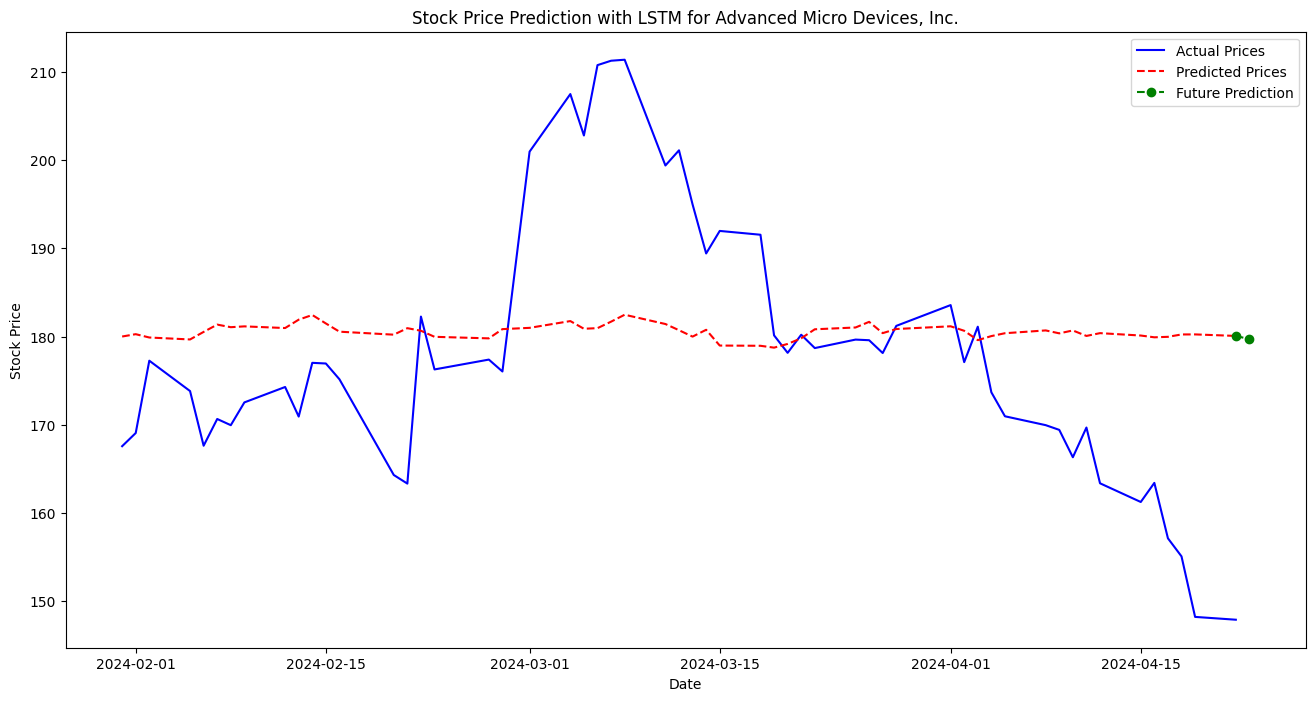

Training model for PayPal Holdings, Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 4s 21ms/step - loss: 0.3032
Epoch 2/100
2/2 [==============================] - 0s 21ms/step - loss: 0.2260
Epoch 3/100
2/2 [==============================] - 0s 21ms/step - loss: 0.1609
Epoch 4/100
2/2 [==============================] - 0s 22ms/step - loss: 0.1116
Epoch 5/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0826
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0965
Epoch 7/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0959
Epoch 8/100
2/2 [==============================] - 0s 22ms/step - loss: 0.1077
Epoch 9/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0799
Epoch 10/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0794
Epoch 11/100
2/2 [==============================] - 0s 20ms/step - loss: 0.0845
Epoch 12/100
2/2 [==============================] - 0s 21ms/step - loss: 0.0859
Epoch 13/100
2/2 [==============================]

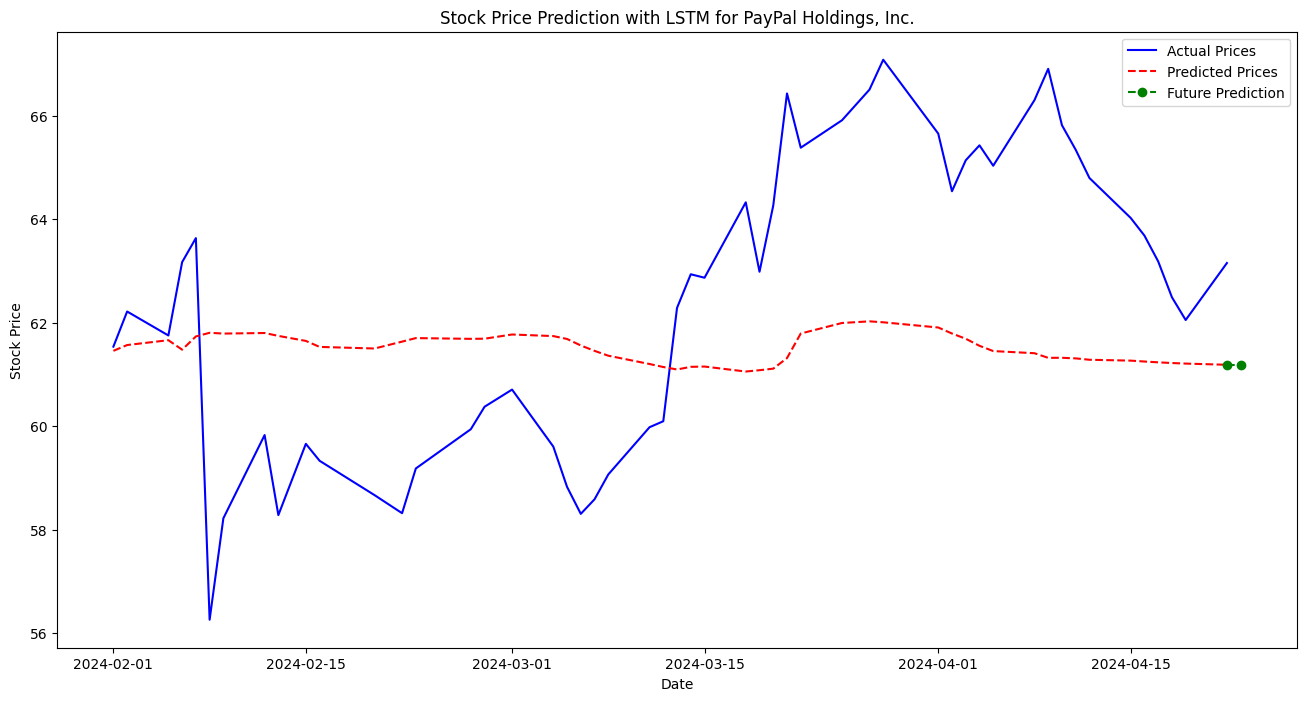

Training model for Alphabet Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 5s 26ms/step - loss: 0.2678
Epoch 2/100
2/2 [==============================] - 0s 30ms/step - loss: 0.2316
Epoch 3/100
2/2 [==============================] - 0s 25ms/step - loss: 0.1923
Epoch 4/100
2/2 [==============================] - 0s 29ms/step - loss: 0.1547
Epoch 5/100
2/2 [==============================] - 0s 28ms/step - loss: 0.1130
Epoch 6/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0813
Epoch 7/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0516
Epoch 8/100
2/2 [==============================] - 0s 23ms/step - loss: 0.0454
Epoch 9/100
2/2 [==============================] - 0s 22ms/step - loss: 0.0638
Epoch 10/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0744
Epoch 11/100
2/2 [==============================] - 0s 24ms/step - loss: 0.0638
Epoch 12/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0554
Epoch 13/100
2/2 [==============================]

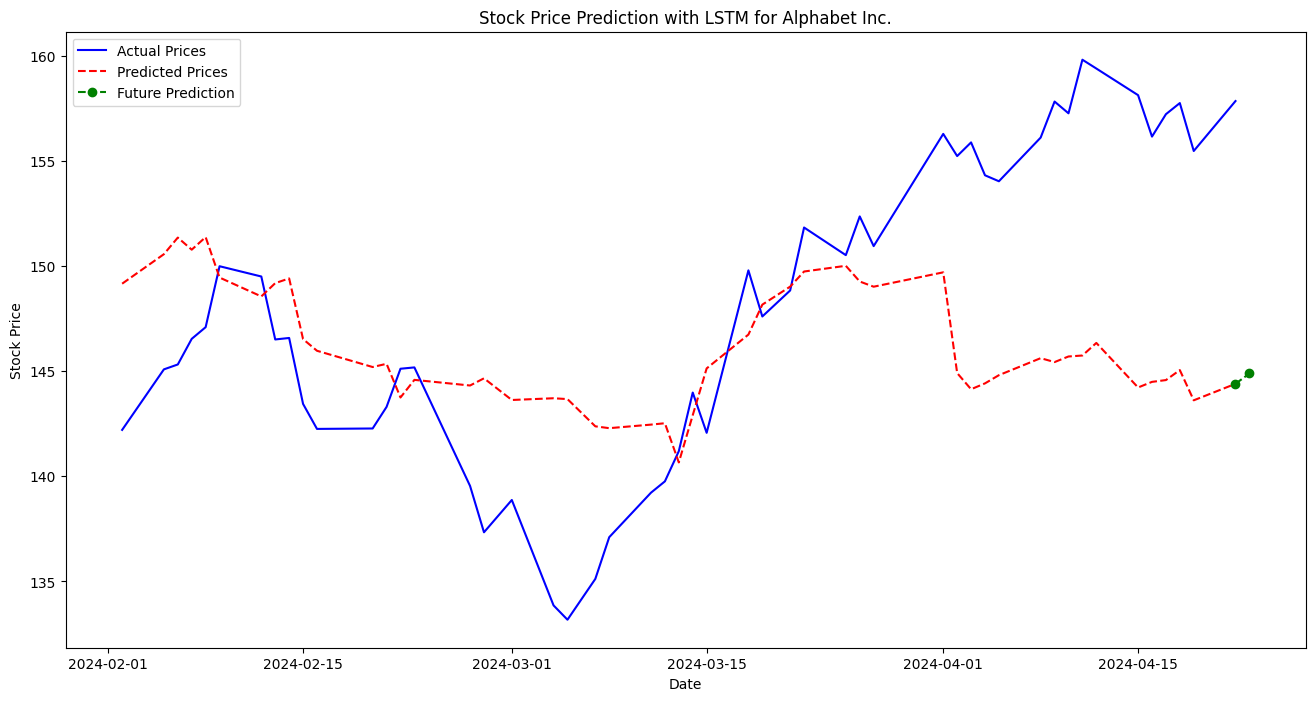

Training model for Netflix, Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
2/2 [==============================] - 8s 24ms/step - loss: 0.5573
Epoch 2/100
2/2 [==============================] - 0s 23ms/step - loss: 0.4281
Epoch 3/100
2/2 [==============================] - 0s 24ms/step - loss: 0.3267
Epoch 4/100
2/2 [==============================] - 0s 27ms/step - loss: 0.2202
Epoch 5/100
2/2 [==============================] - 0s 26ms/step - loss: 0.1150
Epoch 6/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0481
Epoch 7/100
2/2 [==============================] - 0s 27ms/step - loss: 0.0434
Epoch 8/100
2/2 [==============================] - 0s 28ms/step - loss: 0.0845
Epoch 9/100
2/2 [==============================] - 0s 34ms/step - loss: 0.1256
Epoch 10/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0706
Epoch 11/100
2/2 [==============================] - 0s 26ms/step - loss: 0.0343
Epoch 12/100
2/2 [==============================] - 0s 25ms/step - loss: 0.0430
Epoch 13/100
2/2 [==============================]

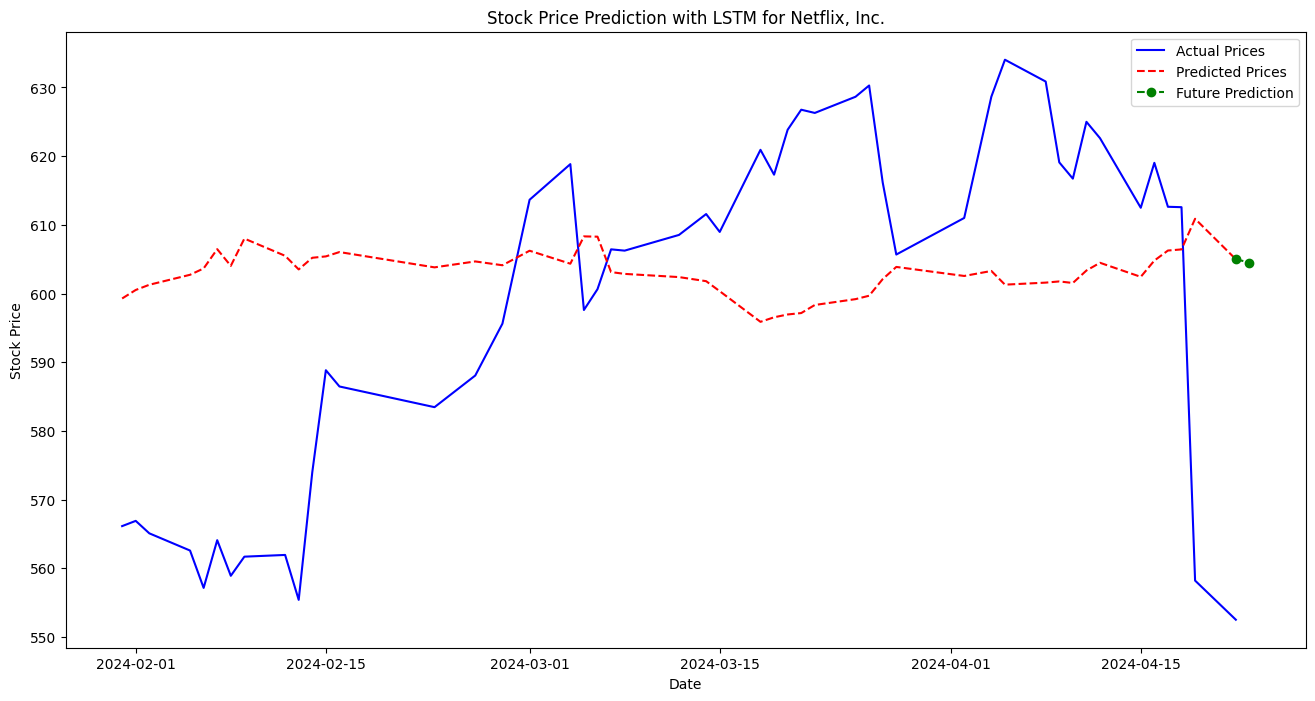

Training model for Costco Wholesale Corporation
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.2664
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 0.2374
Epoch 3/100
1/1 [==============================] - 0s 36ms/step - loss: 0.2111
Epoch 4/100
1/1 [==============================] - 0s 41ms/step - loss: 0.1774
Epoch 5/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1545
Epoch 6/100
1/1 [==============================] - 0s 39ms/step - loss: 0.1269
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0986
Epoch 8/100
1/1 [==============================] - 0s 33ms/step - loss: 0.0770
Epoch 9/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0600
Epoch 10/100
1/1 [==============================] - 0s 42ms/step - loss: 0.0421
Epoch 11/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0296
Epoch 12/100
1/1 [==============================] - 0s 37ms/step - loss: 0.0244
Epoch 13/100
1/1 [==============================] -

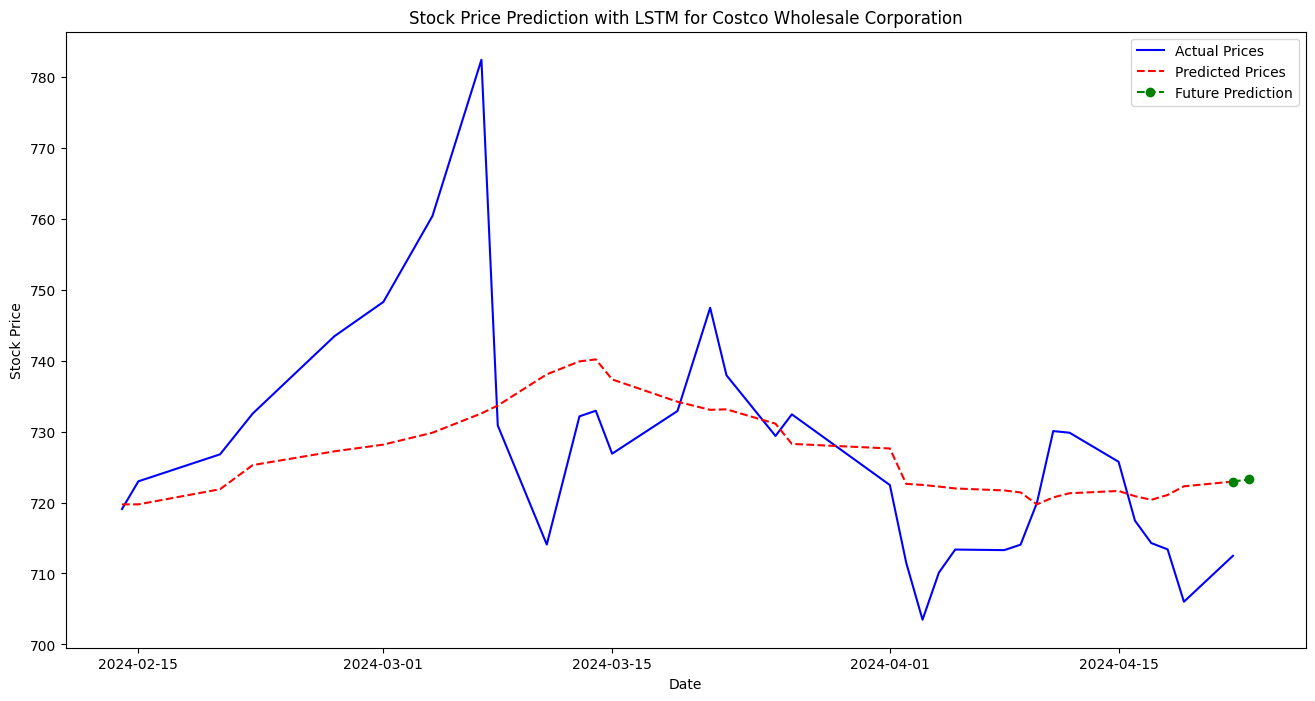

Training model for The Walt Disney Company
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
1/1 [==============================] - 3s 3s/step - loss: 0.6111
Epoch 2/100
1/1 [==============================] - 0s 38ms/step - loss: 0.5647
Epoch 3/100
1/1 [==============================] - 0s 31ms/step - loss: 0.5108
Epoch 4/100
1/1 [==============================] - 0s 30ms/step - loss: 0.4472
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 0.4062
Epoch 6/100
1/1 [==============================] - 0s 31ms/step - loss: 0.3450
Epoch 7/100
1/1 [==============================] - 0s 35ms/step - loss: 0.3018
Epoch 8/100
1/1 [==============================] - 0s 30ms/step - loss: 0.2514
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: 0.2066
Epoch 10/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1601
Epoch 11/100
1/1 [==============================] - 0s 37ms/step - loss: 0.1352
Epoch 12/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0899
Epoch 13/100
1/1 [==============================] -

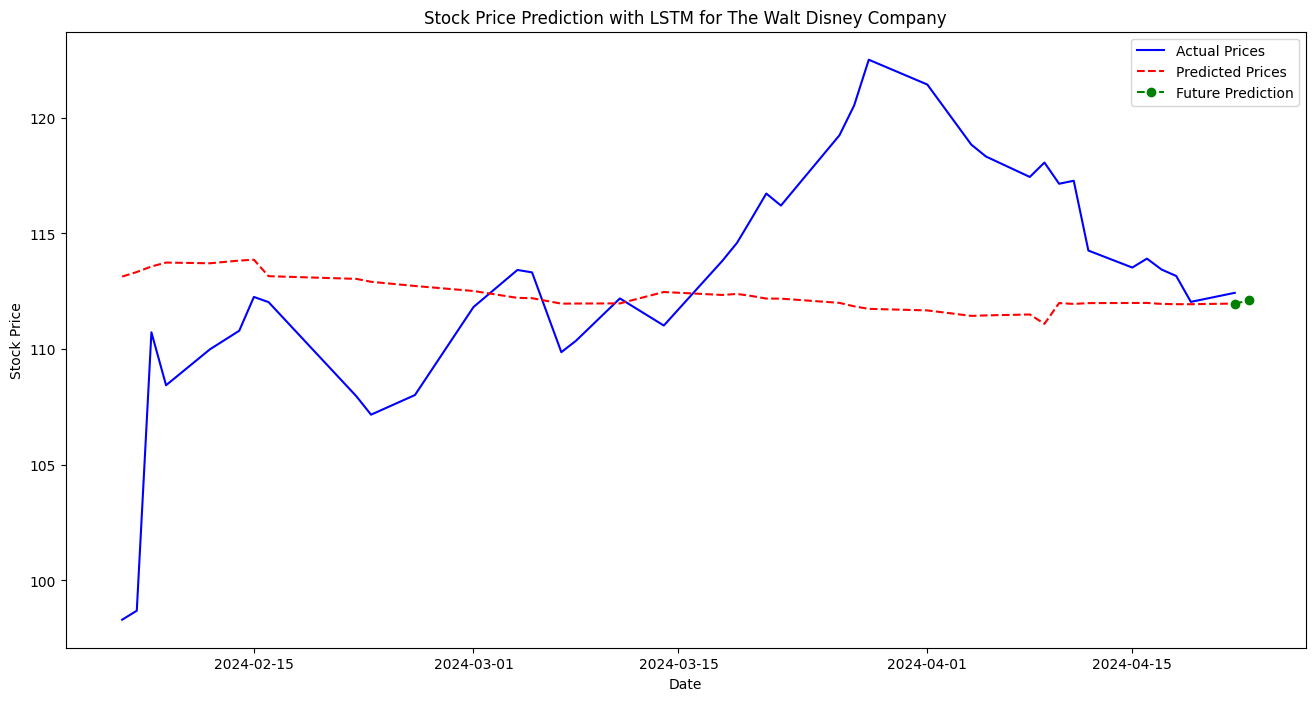

Training model for The Coca-Cola Company
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
1/1 [==============================] - 5s 5s/step - loss: 0.4542
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 0.3881
Epoch 3/100
1/1 [==============================] - 0s 39ms/step - loss: 0.3424
Epoch 4/100
1/1 [==============================] - 0s 34ms/step - loss: 0.2809
Epoch 5/100
1/1 [==============================] - 0s 44ms/step - loss: 0.2474
Epoch 6/100
1/1 [==============================] - 0s 37ms/step - loss: 0.1949
Epoch 7/100
1/1 [==============================] - 0s 31ms/step - loss: 0.1478
Epoch 8/100
1/1 [==============================] - 0s 39ms/step - loss: 0.1112
Epoch 9/100
1/1 [==============================] - 0s 32ms/step - loss: 0.0810
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0661
Epoch 11/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0524
Epoch 12/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0612
Epoch 13/100
1/1 [==============================] -

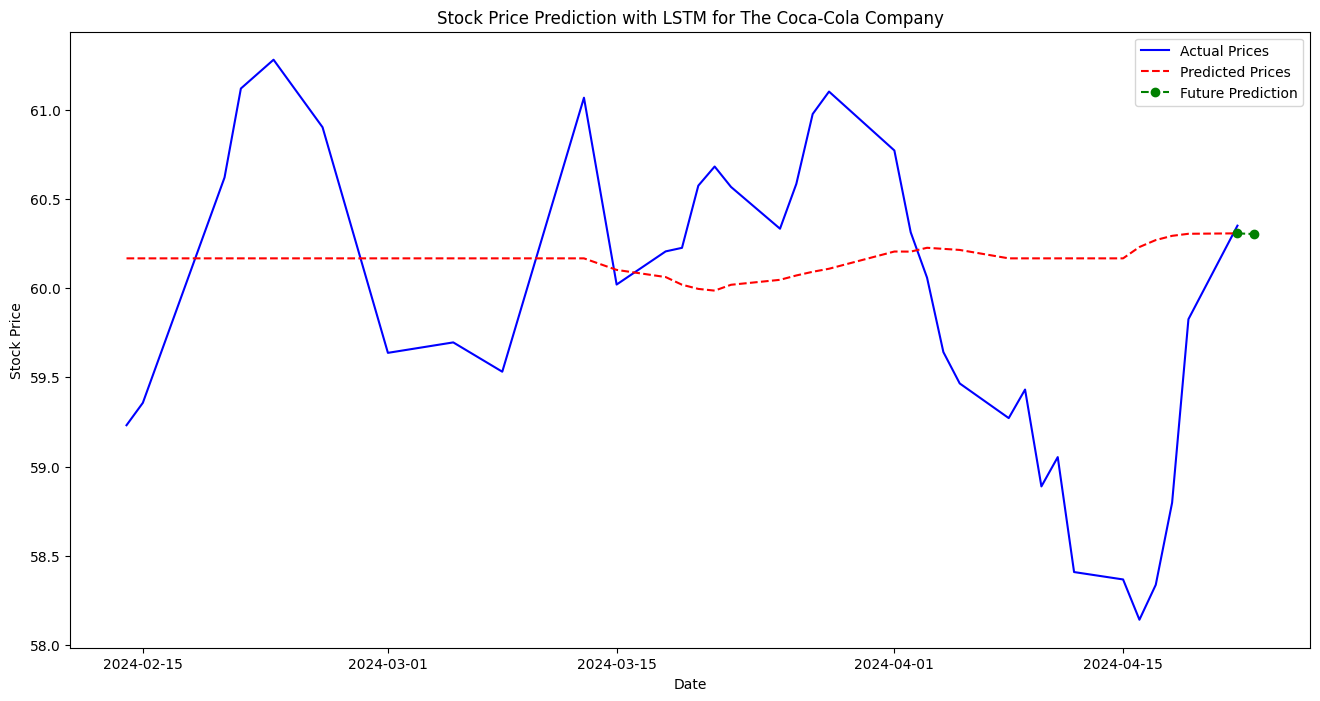

Training model for The Boeing Company
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.3479
Epoch 2/100
1/1 [==============================] - 0s 39ms/step - loss: 0.3160
Epoch 3/100
1/1 [==============================] - 0s 45ms/step - loss: 0.2928
Epoch 4/100
1/1 [==============================] - 0s 43ms/step - loss: 0.2617
Epoch 5/100
1/1 [==============================] - 0s 39ms/step - loss: 0.2375
Epoch 6/100
1/1 [==============================] - 0s 38ms/step - loss: 0.2012
Epoch 7/100
1/1 [==============================] - 0s 44ms/step - loss: 0.1761
Epoch 8/100
1/1 [==============================] - 0s 32ms/step - loss: 0.1439
Epoch 9/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1152
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0882
Epoch 11/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0764
Epoch 12/100
1/1 [==============================] - 0s 29ms/step - loss: 0.0653
Epoch 13/100
1/1 [==============================] -

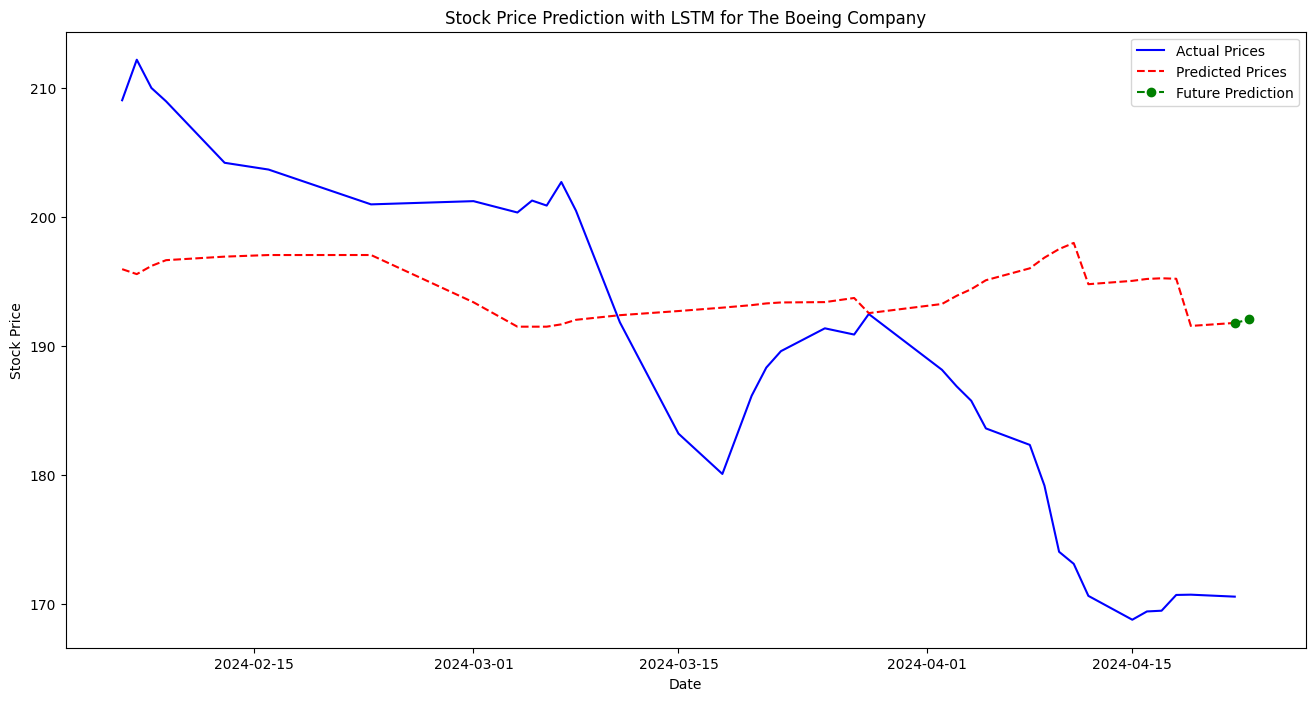

Training model for Northrop Grumman Corporation
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.3569
Epoch 2/100
1/1 [==============================] - 0s 31ms/step - loss: 0.3040
Epoch 3/100
1/1 [==============================] - 0s 32ms/step - loss: 0.2569
Epoch 4/100
1/1 [==============================] - 0s 29ms/step - loss: 0.2047
Epoch 5/100
1/1 [==============================] - 0s 31ms/step - loss: 0.1683
Epoch 6/100
1/1 [==============================] - 0s 29ms/step - loss: 0.1347
Epoch 7/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0924
Epoch 8/100
1/1 [==============================] - 0s 25ms/step - loss: 0.0677
Epoch 9/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0497
Epoch 10/100
1/1 [==============================] - 0s 24ms/step - loss: 0.0363
Epoch 11/100
1/1 [==============================] - 0s 26ms/step - loss: 0.0434
Epoch 12/100
1/1 [==============================] - 0s 27ms/step - loss: 0.0467
Epoch 13/100
1/1 [==============================] -

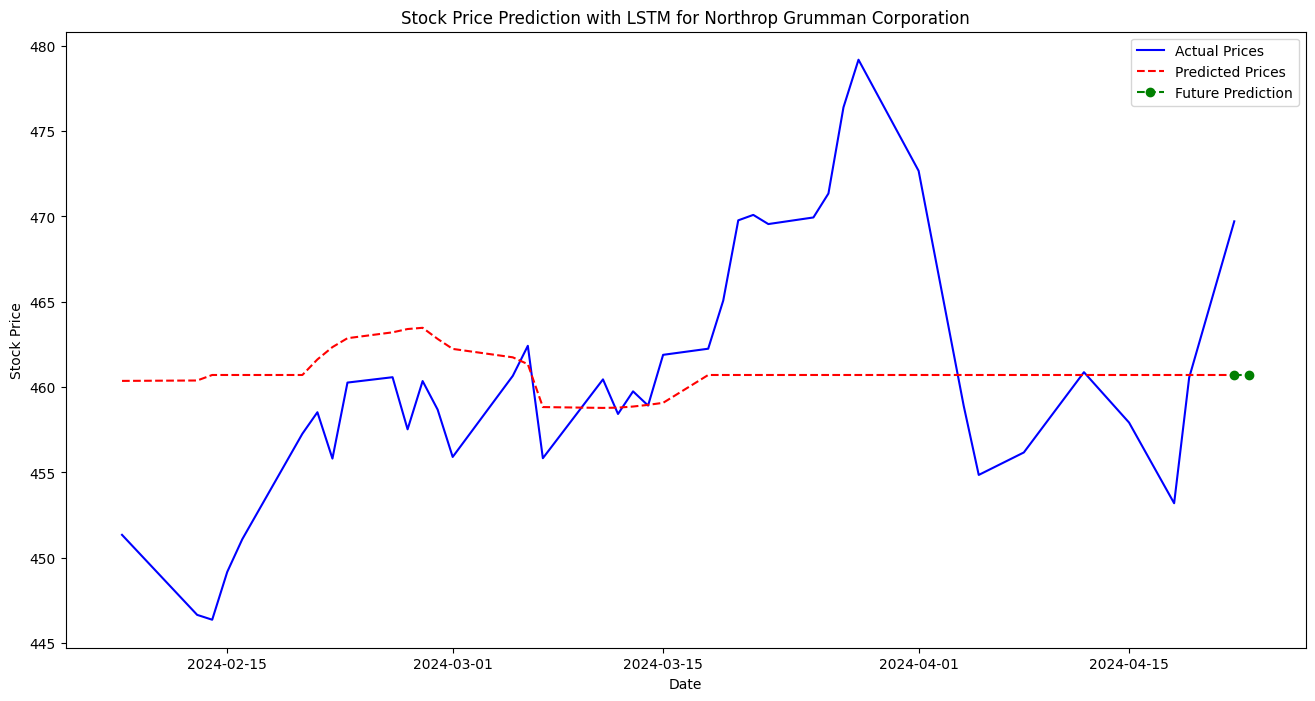

Training model for Zscaler, Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
1/1 [==============================] - 4s 4s/step - loss: 0.2730
Epoch 2/100
1/1 [==============================] - 0s 27ms/step - loss: 0.2564
Epoch 3/100
1/1 [==============================] - 0s 30ms/step - loss: 0.2378
Epoch 4/100
1/1 [==============================] - 0s 28ms/step - loss: 0.2223
Epoch 5/100
1/1 [==============================] - 0s 28ms/step - loss: 0.2080
Epoch 6/100
1/1 [==============================] - 0s 28ms/step - loss: 0.1904
Epoch 7/100
1/1 [==============================] - 0s 27ms/step - loss: 0.1726
Epoch 8/100
1/1 [==============================] - 0s 28ms/step - loss: 0.1614
Epoch 9/100
1/1 [==============================] - 0s 28ms/step - loss: 0.1376
Epoch 10/100
1/1 [==============================] - 0s 31ms/step - loss: 0.1219
Epoch 11/100
1/1 [==============================] - 0s 31ms/step - loss: 0.1075
Epoch 12/100
1/1 [==============================] - 0s 30ms/step - loss: 0.0892
Epoch 13/100
1/1 [==============================] -

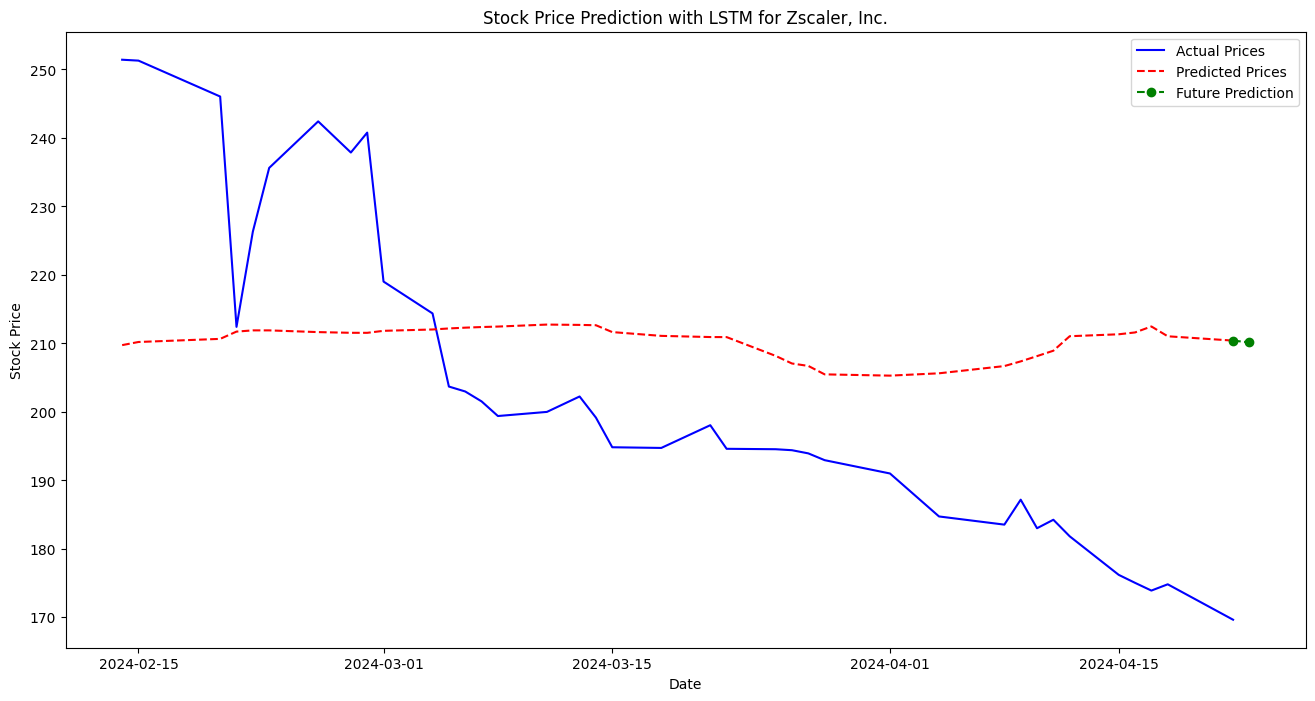

Training model for Enphase Energy, Inc.
Index(['date', 'company_id', 'company_name', 'sentiment_value'], dtype='object')


<ipython-input-50-091b64d402e3>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['date'] = pd.to_datetime(df_filtered['date'])
<ipython-input-50-091b64d402e3>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered.fillna(method='ffill', inplace=True)  # Forward fill to handle missing data


Epoch 1/100
1/1 [==============================] - 8s 8s/step - loss: 0.1990
Epoch 2/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1862
Epoch 3/100
1/1 [==============================] - 0s 38ms/step - loss: 0.1755
Epoch 4/100
1/1 [==============================] - 0s 38ms/step - loss: 0.1636
Epoch 5/100
1/1 [==============================] - 0s 38ms/step - loss: 0.1524
Epoch 6/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1422
Epoch 7/100
1/1 [==============================] - 0s 36ms/step - loss: 0.1284
Epoch 8/100
1/1 [==============================] - 0s 34ms/step - loss: 0.1185
Epoch 9/100
1/1 [==============================] - 0s 36ms/step - loss: 0.1052
Epoch 10/100
1/1 [==============================] - 0s 35ms/step - loss: 0.0985
Epoch 11/100
1/1 [==============================] - 0s 42ms/step - loss: 0.0835
Epoch 12/100
1/1 [==============================] - 0s 34ms/step - loss: 0.0807
Epoch 13/100
1/1 [==============================] -

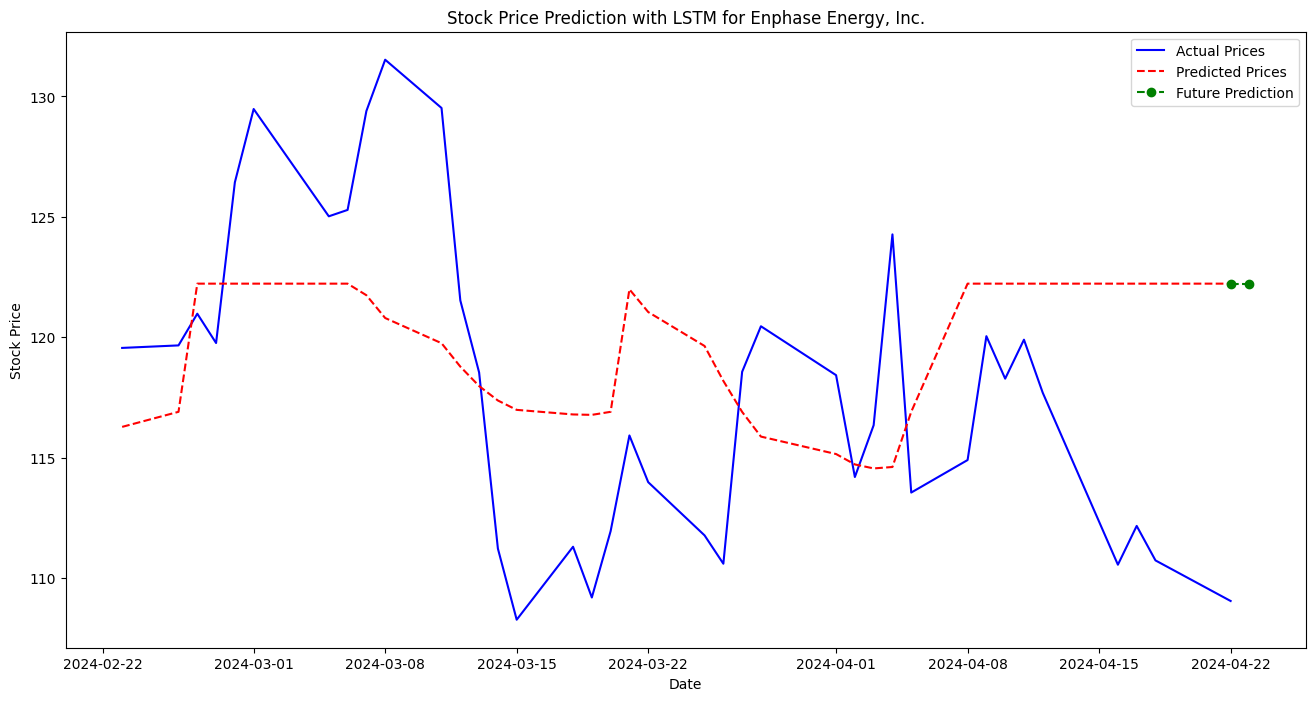

In [52]:
for company in companies:
    print(f"Training model for {company}")
    features, target = prepare_data_for_company(company)
    scaler_features = MinMaxScaler(feature_range=(0, 1))
    scaler_target = MinMaxScaler(feature_range=(0, 1))
    scaled_features = scaler_features.fit_transform(features)
    scaled_target = scaler_target.fit_transform(target.values.reshape(-1, 1))
    time_steps = 10
    X, y = create_dataset(scaled_features, scaled_target, time_steps)
    train_size = int(len(X) * 0.8)
    X_train, X_test = X[:train_size], X[train_size:]
    y_train, y_test = y[:train_size], y[train_size:]
    model = train_lstm_model(X_train, y_train, X_test, y_test)
    y_pred_scaled = model.predict(X)
    y_pred = scaler_target.inverse_transform(y_pred_scaled)
    dates = features.index[time_steps:]

    # Evaluate the model on test data
    y_test_pred_scaled = model.predict(X_test)
    y_test_pred = scaler_target.inverse_transform(y_test_pred_scaled.reshape(-1, 1))
    mae, mse, rmse, r2 = evaluate_model(scaler_target.inverse_transform(y_test), y_test_pred)

    print(f"Evaluation results for {company}:")
    print(f"Mean Absolute Error (MAE): {mae}")
    print(f"Mean Squared Error (MSE): {mse}")
    print(f"Root Mean Squared Error (RMSE): {rmse}")
    print(f"R-squared (R2) Score: {r2}")

    # Plotting
    plt.figure(figsize=(16, 8))
    plt.plot(dates, scaler_target.inverse_transform(y), label="Actual Prices", color='blue')
    plt.plot(dates, y_pred, label="Predicted Prices", color='red', linestyle='--')

    # Forecasting future prices
    last_sequence = scaled_features[-time_steps:]
    last_sequence = np.expand_dims(last_sequence, axis=0)
    future_scaled = model.predict(last_sequence)
    future = scaler_target.inverse_transform(future_scaled)
    future_dates = pd.date_range(start=dates[-1], periods=2, freq='B')
    plt.plot(future_dates, [y_pred[-1][0], future[0][0]], label="Future Prediction", color='green', linestyle='--', marker='o')

    plt.title(f"Stock Price Prediction with LSTM for {company}")
    plt.xlabel("Date")
    plt.ylabel("Stock Price")
    plt.legend()
    plt.show()